In [2]:
# Print the current working directory. sys.path.append works with relative paths, so this is useful to know.
import os
print(os.getcwd())

c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\files


In [3]:
import sys
sys.path.append('../src/')

In [4]:
import gymnasium as gym
import airfoil_env
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
env = gym.make('AirfoilEnv-v0', n_params=10, max_steps=10, scale_actions = 0.15, airfoil_seed = [0.1*np.ones(10), -0.1*np.ones(10), 0.0],
                    delta_reward=False, cl_reward = True, cl_reset = 0.2, efficiency_param = 1, cl_wide = 20, render_mode="human")
model = PPO.load("../models/230424/230424_2M_LearningStudy_0.001_Gamma0.99/logs/best_model.zip", env=env)
#model = PPO.load("16042024_NewRewardCl_4_DeltaReward", env=env)

In [5]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=15, deterministic=True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:408.54 +/- 56.84


In [3]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()

Step: 0, Action: [[ 0.22957847  0.27159256  0.1651732   0.3359366   0.4448061   0.4450457
   0.52090925  0.5543854   0.2660986   0.25375408 -0.30815783 -0.1715879
  -0.15140405 -0.23472954 -0.2638532  -0.22069827 -0.34375122 -0.31197363
  -0.13416938 -0.15182678 -0.05222807]], Reward: [-100.], Done: [False], Info: [{'step': 1, 'efficiency': 0.0, 'cl': 0.0, 'TimeLimit.truncated': False}]


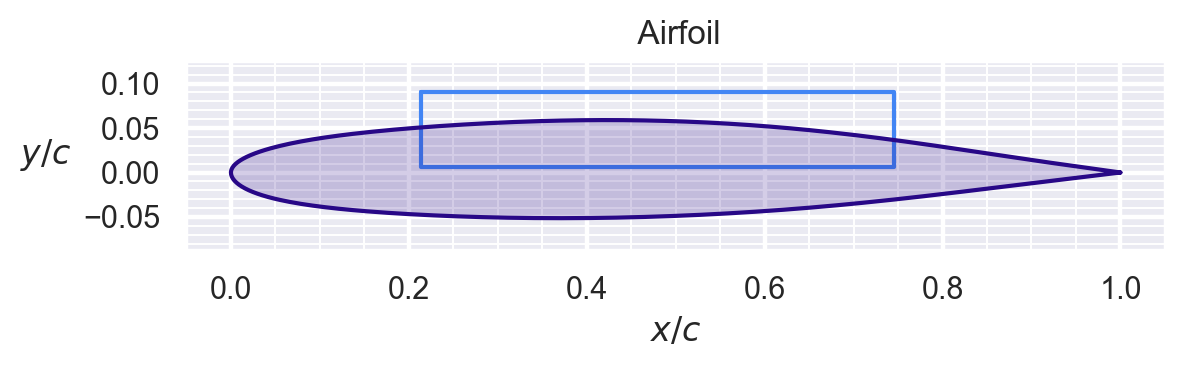

Step: 1, Action: [[ 0.278288    0.31888828  0.22489716  0.34656113  0.47594774  0.45837542
   0.5234575   0.54698044  0.27939805  0.27676046 -0.37128264 -0.19109222
  -0.18889117 -0.26908365 -0.27885547 -0.2384461  -0.37830234 -0.34177035
  -0.15960903 -0.19324121 -0.02686792]], Reward: [-100.], Done: [False], Info: [{'step': 2, 'efficiency': 0.0, 'cl': 0.0, 'TimeLimit.truncated': False}]


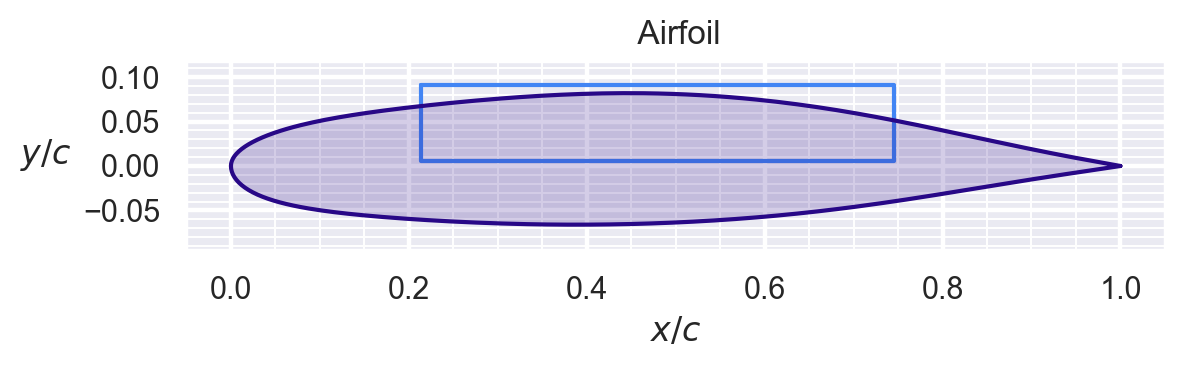

Step: 2, Action: [[ 3.2466346e-01  3.6003816e-01  2.8269255e-01  3.5538673e-01
   5.0933099e-01  4.7424626e-01  5.2709502e-01  5.3846538e-01
   2.9226694e-01  2.9697710e-01 -4.2812774e-01 -2.0814726e-01
  -2.2508241e-01 -3.0042917e-01 -2.9285187e-01 -2.5384289e-01
  -4.1266853e-01 -3.6966240e-01 -1.8512650e-01 -2.3346861e-01
   1.9174442e-04]], Reward: [-100.], Done: [False], Info: [{'step': 3, 'efficiency': 0.0, 'cl': 0.0, 'TimeLimit.truncated': False}]


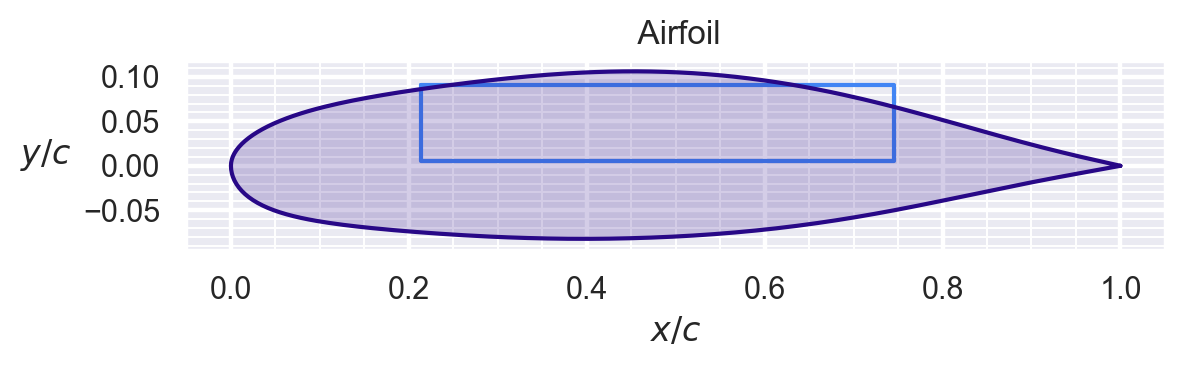

Step: 3, Action: [[ 0.36836806  0.39466202  0.33785054  0.3617202   0.54375046  0.49124086
   0.5305987   0.5281498   0.30413103  0.31394133 -0.47895575 -0.2228803
  -0.259702   -0.32863724 -0.30555615 -0.26674896 -0.44627243 -0.39515972
  -0.20999084 -0.27221692  0.02878525]], Reward: [-100.], Done: [False], Info: [{'step': 4, 'efficiency': 0.0, 'cl': 0.0, 'TimeLimit.truncated': False}]


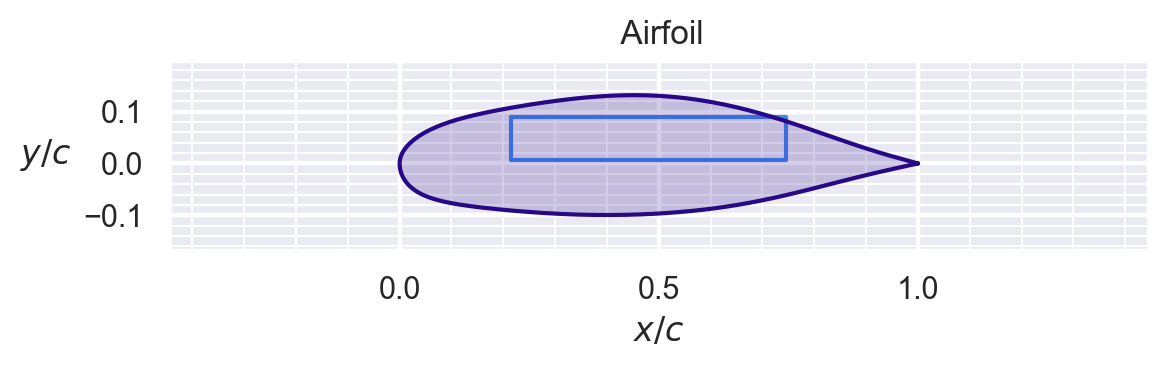

Step: 4, Action: [[ 0.40920475  0.42281547  0.38987607  0.3652431   0.5783196   0.5083066
   0.53334534  0.51578474  0.3146461   0.3273782  -0.5240151  -0.23546699
  -0.29245427 -0.3535994  -0.31679782 -0.27712458 -0.47872758 -0.41797763
  -0.23374565 -0.30913877  0.05861908]], Reward: [17.09728], Done: [False], Info: [{'step': 5, 'efficiency': 17.59732766929055, 'cl': 0.162034428200872, 'TimeLimit.truncated': False}]


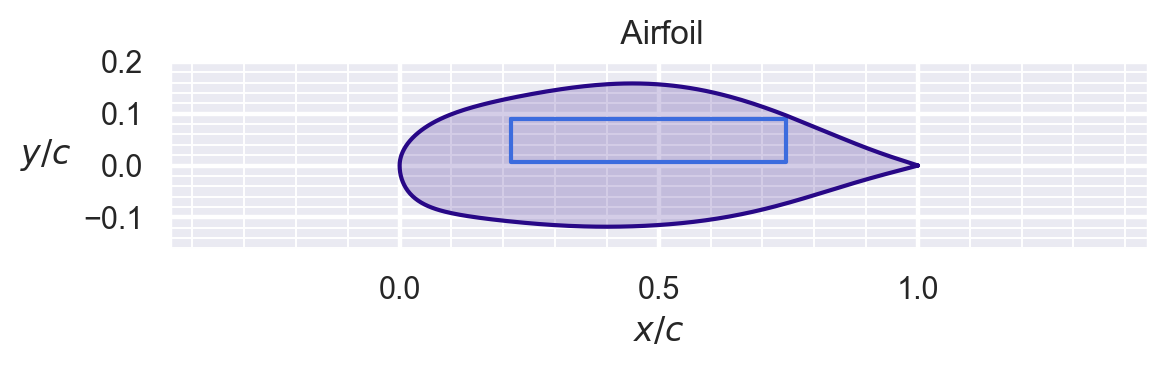

Step: 5, Action: [[ 0.44706413  0.44484293  0.4384262   0.36590368  0.6123785   0.5246708
   0.53511536  0.50143075  0.3236363   0.33719397 -0.56355536 -0.24611261
  -0.32306856 -0.3752552  -0.32650575 -0.2850127  -0.5097852  -0.4380048
  -0.25613    -0.34390077  0.08931147]], Reward: [11.770345], Done: [False], Info: [{'step': 6, 'efficiency': 12.164684105844398, 'cl': 0.1594082583326486, 'TimeLimit.truncated': False}]


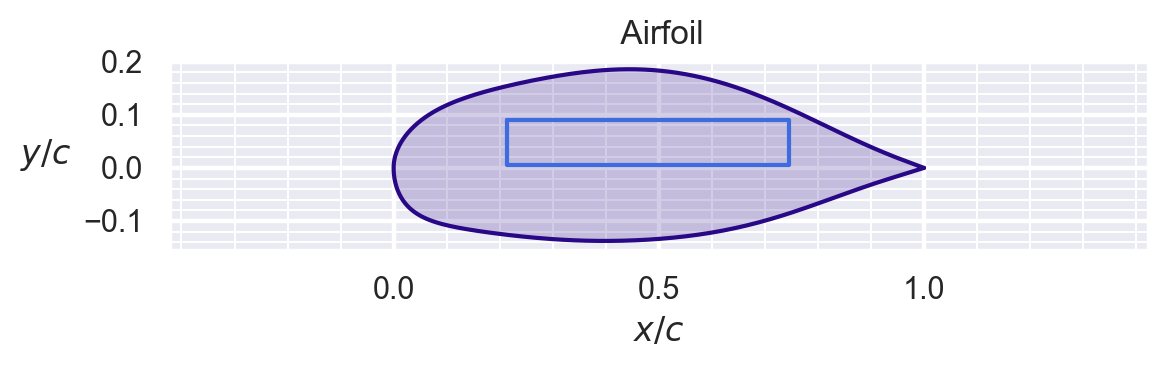

Step: 6, Action: [[ 0.48187095  0.46122032  0.48324525  0.36380333  0.6453964   0.5397465
   0.53587985  0.48531136  0.3310246   0.34343857 -0.5978186  -0.2550261
  -0.35132056 -0.39359534 -0.3346717  -0.29051057 -0.539267   -0.4552474
  -0.27698568 -0.37622902  0.12043539]], Reward: [6.581495], Done: [False], Info: [{'step': 7, 'efficiency': 7.073526856750217, 'cl': 0.13995945513939656, 'TimeLimit.truncated': False}]


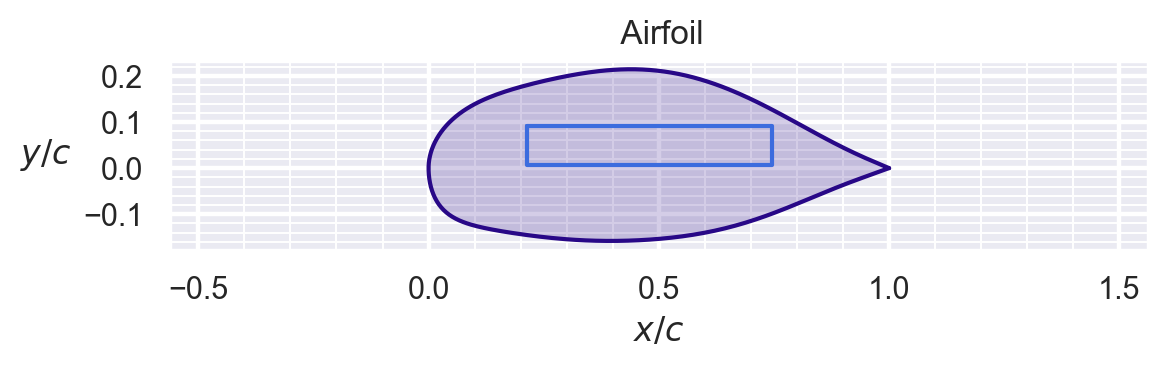

Step: 7, Action: [[ 0.5135622   0.47245488  0.52413785  0.35912576  0.6769228   0.5530804
   0.5356636   0.46771497  0.33679122  0.3462689  -0.62704086 -0.2624057
  -0.37704295 -0.40866047 -0.34132504 -0.2937497  -0.56702745 -0.46978492
  -0.29619622 -0.40593362  0.15155691]], Reward: [2.5887082], Done: [False], Info: [{'step': 8, 'efficiency': 3.2013166327411606, 'cl': 0.09694584575062803, 'TimeLimit.truncated': False}]


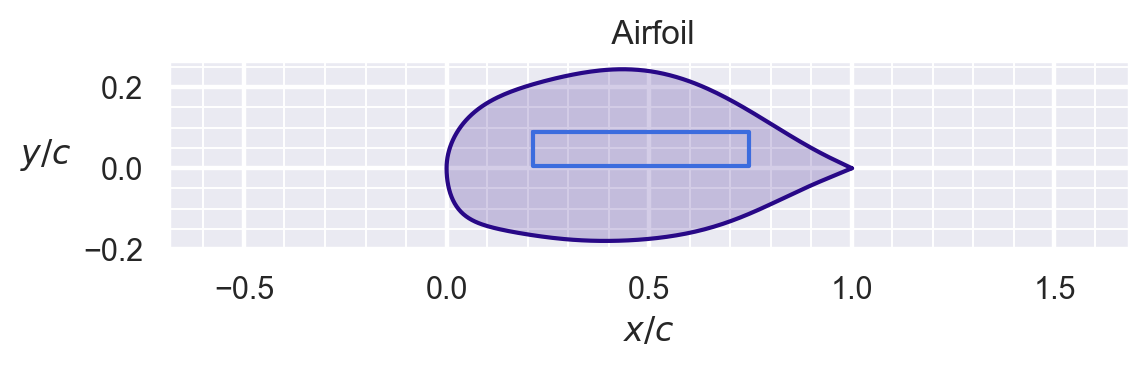

Step: 8, Action: [[ 0.5420969   0.47904775  0.56097776  0.35210794  0.7065825   0.56433916
   0.5344916   0.44894865  0.34095886  0.3459223  -0.65146846 -0.26843894
  -0.40013224 -0.42054302 -0.34652287 -0.29488736 -0.5929485  -0.48174542
  -0.31366444 -0.4329166   0.18226677]], Reward: [0.42476434], Done: [False], Info: [{'step': 9, 'efficiency': 0.7395584535986987, 'cl': 0.03348891882560978, 'TimeLimit.truncated': False}]


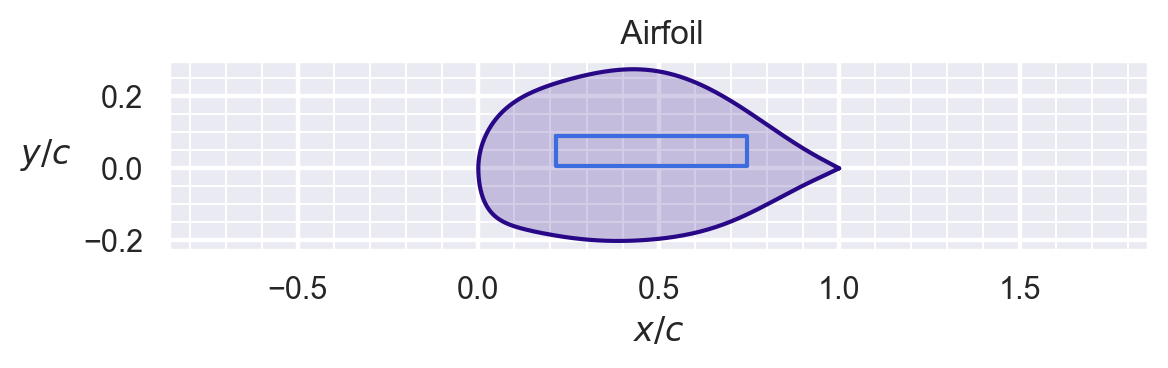

Step: 9, Action: [[ 0.56747806  0.48149088  0.59372944  0.34303182  0.73409235  0.5733146
   0.5323853   0.42932296  0.34359217  0.34269655 -0.6713782  -0.2733087
  -0.42055157 -0.42938983 -0.35034937 -0.2941043  -0.6169515  -0.49129185
  -0.32931238 -0.45716995  0.21220422]], Reward: [-0.21004654], Done: [ True], Info: [{'step': 10, 'efficiency': -0.7046662696910937, 'cl': -0.04600763586811807, 'episode': {'r': -361.747455, 'l': 10, 't': 14.325895}, 'TimeLimit.truncated': False, 'terminal_observation': {'airfoil': array([ 0.72432625,  0.716058  ,  0.7001509 ,  0.6323231 ,  0.9891292 ,
        0.869855  ,  0.89634126,  0.8524742 ,  0.5698816 ,  0.5776497 ,
       -0.8832701 , -0.45017   , -0.5484475 , -0.6270884 , -0.5735934 ,
       -0.50726885, -0.8328553 , -0.7258928 , -0.45923954, -0.57640636,
        0.11464123], dtype=float32), 'cl_target': array([0.2], dtype=float32), 'boxes': array([0.4797128 , 0.04819075, 0.5311814 , 0.08462854], dtype=float32)}}]


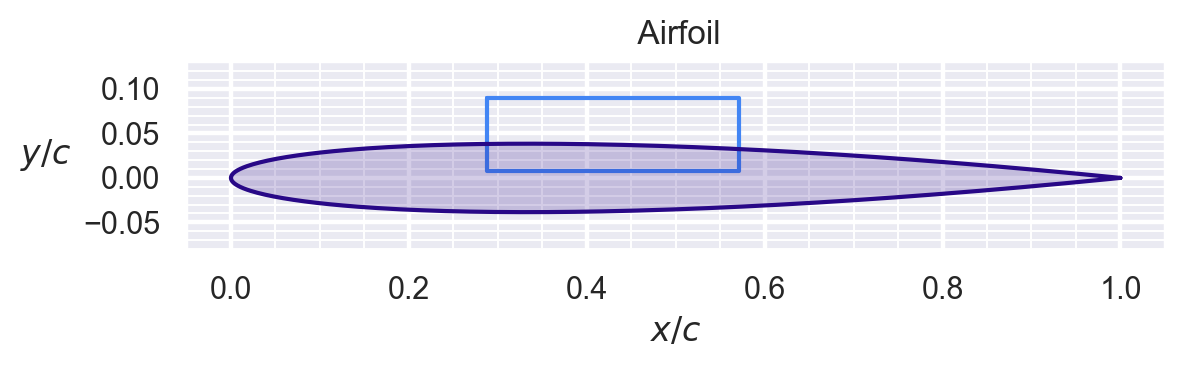

Step: 10, Action: [[ 0.317353    0.36857548  0.38911435  0.5225105   0.59227973  0.5394277
   0.48606306  0.47483867  0.25218043  0.36398327 -0.45564157 -0.23677048
  -0.25498933 -0.3371551  -0.33032513 -0.2328218  -0.34475136 -0.28390053
  -0.09071146 -0.2801767   0.00500277]], Reward: [-100.], Done: [False], Info: [{'step': 1, 'efficiency': 0.0, 'cl': 0.0, 'TimeLimit.truncated': False}]


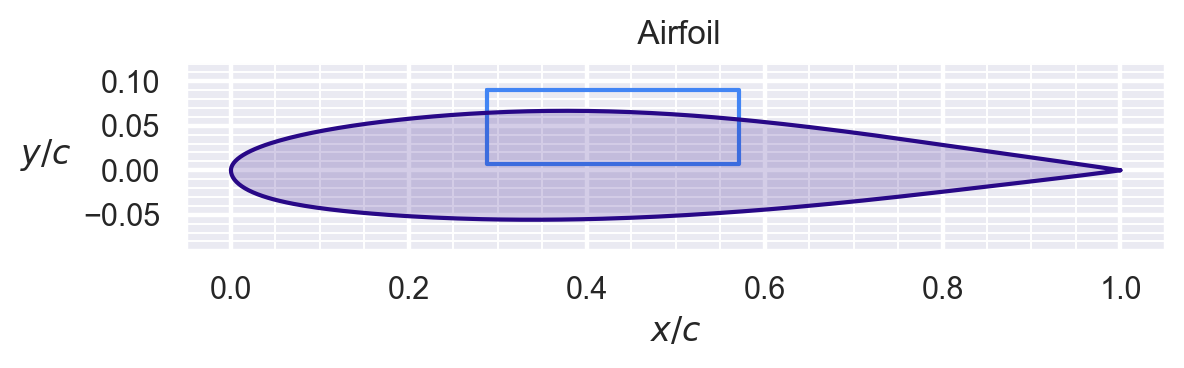

Step: 11, Action: [[ 0.36499968  0.39847696  0.44027445  0.51575935  0.62189883  0.56415796
   0.5042928   0.4721547   0.27530783  0.3785175  -0.5098217  -0.25327557
  -0.2942654  -0.36475518 -0.35608602 -0.2526185  -0.3956383  -0.32529128
  -0.12287524 -0.3232245   0.03322467]], Reward: [-100.], Done: [False], Info: [{'step': 2, 'efficiency': 0.0, 'cl': 0.0, 'TimeLimit.truncated': False}]


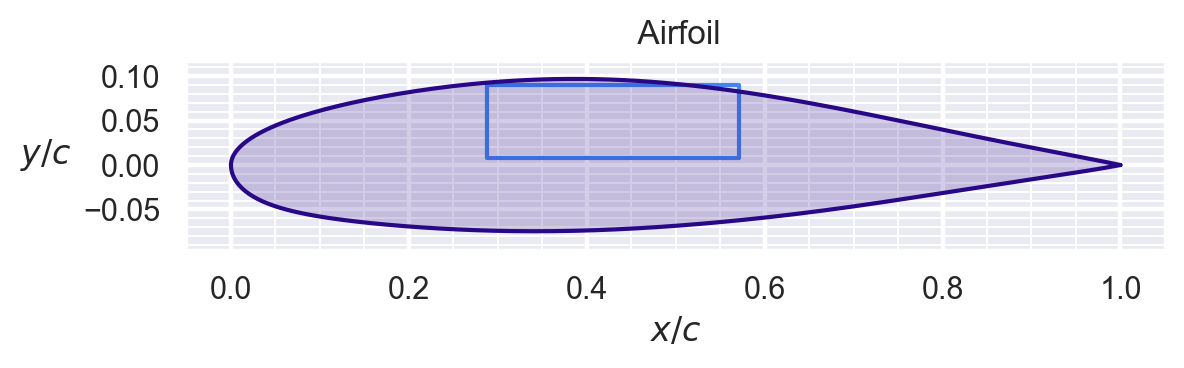

Step: 12, Action: [[ 0.41063493  0.4226694   0.48989376  0.50721407  0.6523757   0.5880311
   0.51922125  0.46575347  0.2961256   0.38891137 -0.5587318  -0.26752585
  -0.3306985  -0.3885377  -0.3785993  -0.26868975 -0.44407666 -0.3621113
  -0.15326323 -0.36483368  0.06321821]], Reward: [22.373411], Done: [False], Info: [{'step': 3, 'efficiency': 23.13449445853267, 'cl': 0.15910288128736083, 'TimeLimit.truncated': False}]


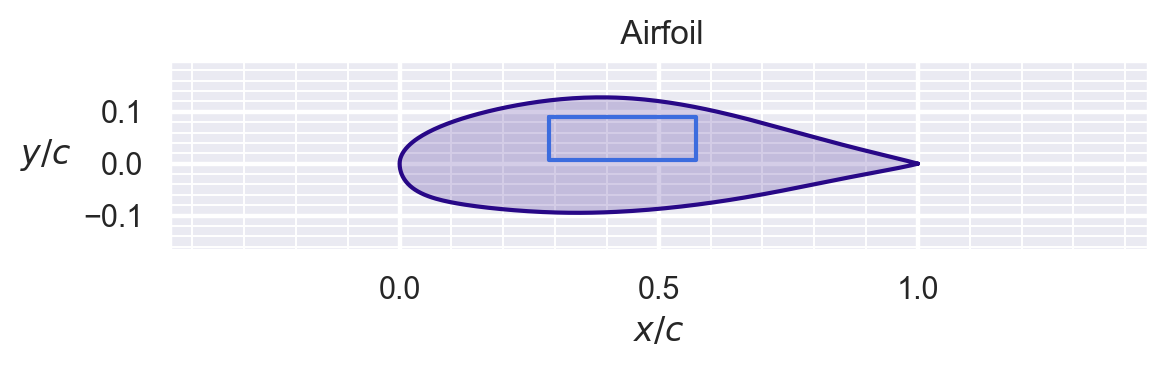

Step: 13, Action: [[ 0.45360336  0.44085464  0.53690267  0.49634025  0.6825754   0.60992265
   0.5304334   0.4555285   0.31419185  0.39485592 -0.60199237 -0.27955502
  -0.3639335  -0.40834925 -0.39771655 -0.28100568 -0.4895141  -0.39406854
  -0.18142055 -0.40439606  0.09452932]], Reward: [23.035717], Done: [False], Info: [{'step': 4, 'efficiency': 23.10769641075597, 'cl': 0.18751033497195158, 'TimeLimit.truncated': False}]


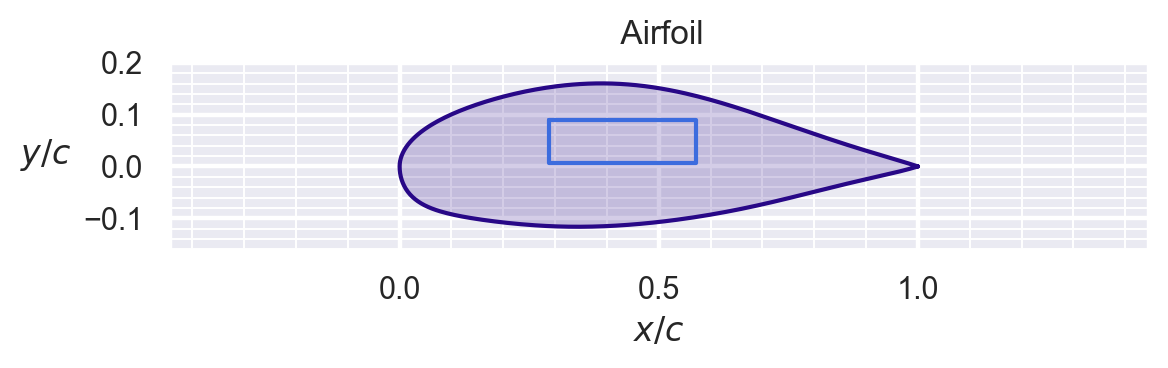

Step: 14, Action: [[ 0.49349248  0.45330432  0.580594    0.48308137  0.7117806   0.6291636
   0.53815365  0.44188106  0.32936794  0.39636868 -0.6394453  -0.28950635
  -0.39371127 -0.42418343 -0.41349405 -0.28971267 -0.531697   -0.42119026
  -0.20720448 -0.44137067  0.12659594]], Reward: [18.16904], Done: [False], Info: [{'step': 5, 'efficiency': 18.173987029912123, 'cl': 0.19631060191501692, 'TimeLimit.truncated': False}]


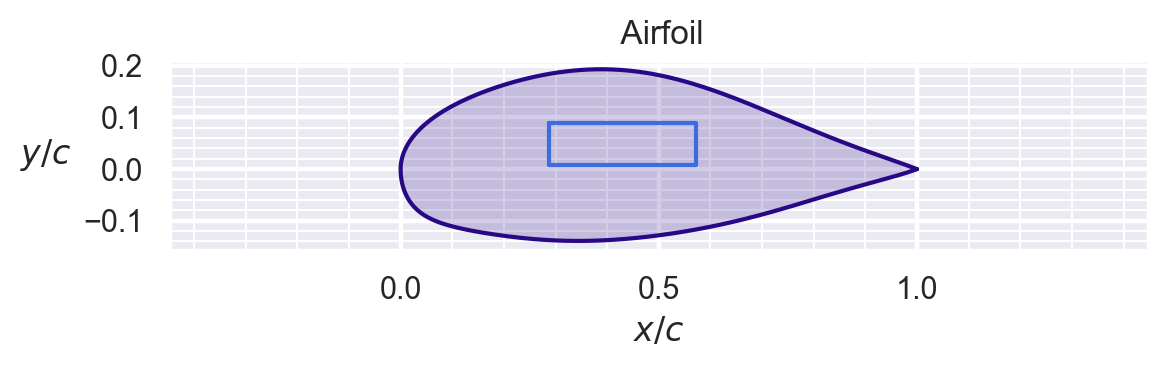

Step: 15, Action: [[ 0.53002244  0.46054038  0.62048644  0.46762913  0.73949826  0.64535934
   0.5428479   0.42543483  0.3416836   0.39370024 -0.6710993  -0.29757357
  -0.41988766 -0.4361569  -0.42611223 -0.29506463 -0.5705335  -0.4437021
  -0.23060773 -0.47535673  0.15882772]], Reward: [8.728357], Done: [False], Info: [{'step': 6, 'efficiency': 9.123252515571547, 'cl': 0.1529632100659497, 'TimeLimit.truncated': False}]


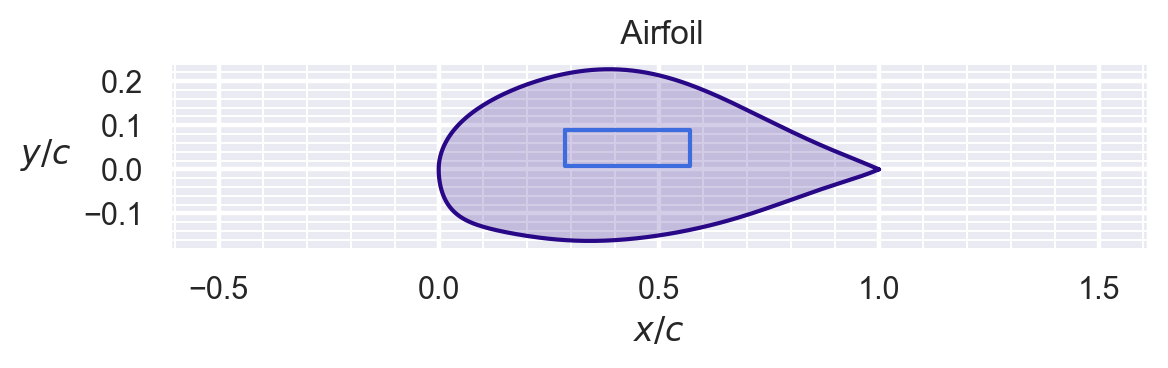

Step: 16, Action: [[ 0.5629946   0.46313626  0.65625465  0.45027992  0.7653527   0.6582839
   0.5449813   0.40685183  0.351255    0.38724488 -0.69709176 -0.30396467
  -0.44242752 -0.4444768  -0.4358145  -0.29737127 -0.60601085 -0.46193266
  -0.25164884 -0.5061189   0.19066863]], Reward: [0.72363394], Done: [False], Info: [{'step': 7, 'efficiency': 1.2434487753984198, 'cl': 0.03547668249783853, 'TimeLimit.truncated': False}]


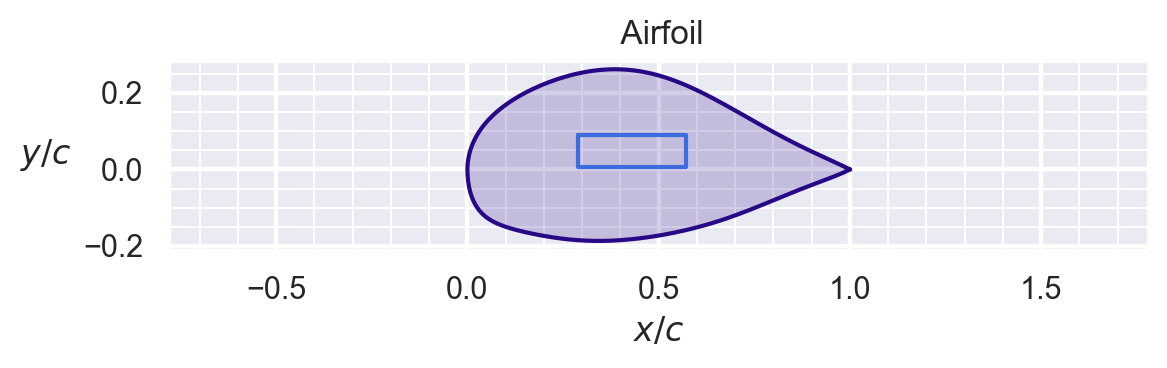

Step: 17, Action: [[ 0.59229624  0.4616475   0.68772334  0.43137652  0.789065    0.6678495
   0.54493964  0.38675448  0.35825437  0.3774776  -0.71767706 -0.3088936
  -0.461394   -0.44941953 -0.44287843 -0.29697117 -0.6381717  -0.4762598
  -0.27033877 -0.5335803   0.22163796]], Reward: [-0.2339094], Done: [False], Info: [{'step': 8, 'efficiency': -3.2310669513235366, 'cl': -0.16232815605918538, 'TimeLimit.truncated': False}]


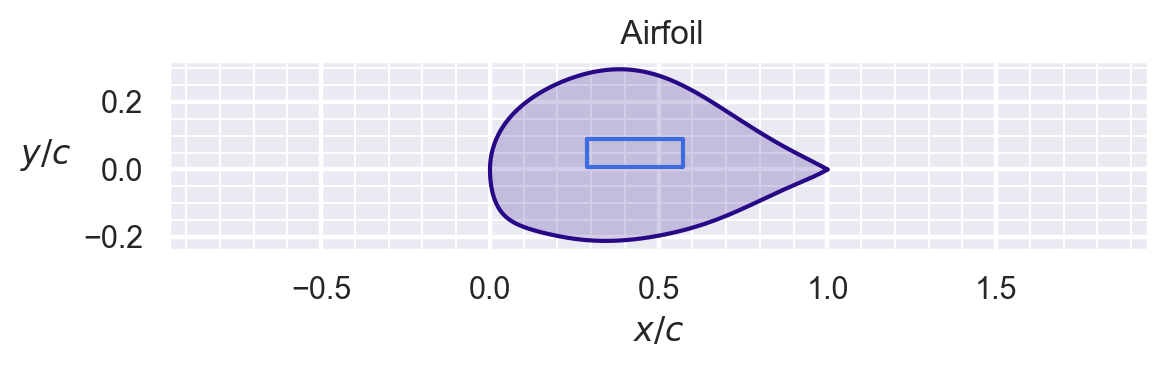

Step: 18, Action: [[ 0.6179218   0.456607    0.7148799   0.41129074  0.8104657   0.67410344
   0.54303724  0.3657046   0.36290225  0.36491382 -0.7332205  -0.3125824
  -0.4769355  -0.4513146  -0.44760418 -0.2942178  -0.6671179  -0.48708403
  -0.28668886 -0.55780107  0.2513524 ]], Reward: [-0.00345695], Done: [False], Info: [{'step': 9, 'efficiency': -4.704434290161025, 'cl': -0.4006609978792376, 'TimeLimit.truncated': False}]


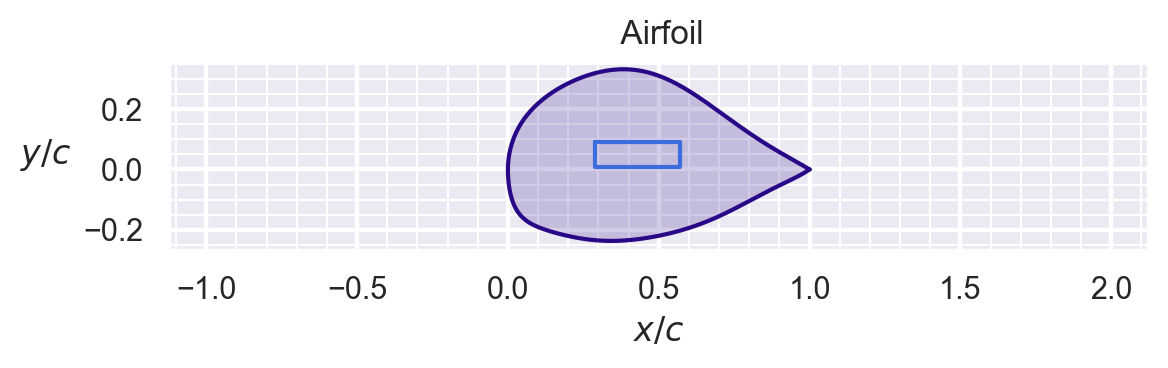

Step: 19, Action: [[ 0.6399802   0.4485341   0.7378712   0.39041057  0.8295023   0.67721987
   0.53954494  0.34419885  0.36545962  0.35007846 -0.74418116 -0.3152616
  -0.489268   -0.45052865 -0.45030612 -0.28946888 -0.6930124  -0.49481192
  -0.30072868 -0.57894766  0.27953285]], Reward: [-8.301311e-06], Done: [ True], Info: [{'step': 10, 'efficiency': -4.745934959274661, 'cl': -0.614137138094471, 'episode': {'r': -127.207215, 'l': 10, 't': 17.099754}, 'TimeLimit.truncated': False, 'terminal_observation': {'airfoil': array([ 0.84749484,  0.756152  ,  0.9780992 ,  0.8013839 ,  1.1792191 ,
        1.0380279 ,  0.8940273 ,  0.7358652 ,  0.5870093 ,  0.6694078 ,
       -1.0493354 , -0.5297364 , -0.6891266 , -0.7232316 , -0.7118405 ,
       -0.51969135, -0.90707856, -0.7225529 , -0.41432318, -0.769871  ,
        0.21368858], dtype=float32), 'cl_target': array([0.2], dtype=float32), 'boxes': array([0.42962757, 0.04865011, 0.2832643 , 0.08230921], dtype=float32)}}]


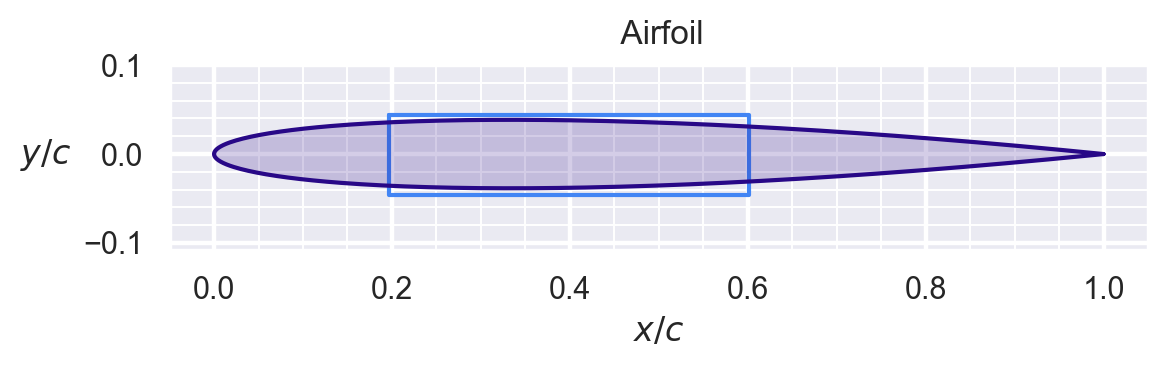

In [4]:

for i in range(20):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    print(f"Step: {i}, Action: {action}, Reward: {rewards}, Done: {dones}, Info: {info}")
    vec_env.render()